# IRIS FLOWER CLASSIFICATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')

### PREPROCESSING

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.iloc[:, [1,2,3,4,5]];

In [6]:
df.shape
#df.shape[0]
#df.shape[1]

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.notnull().any() 
#df.isnull().count(), 
#df.isnull().sum(), #
#df.notnull().sum(), 
#df.notnull().count()

SepalLengthCm    True
SepalWidthCm     True
PetalLengthCm    True
PetalWidthCm     True
Species          True
dtype: bool

In [9]:
df.columns
#print(df.columns)
#df.columns.tolist()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### Exploratory data Analysis

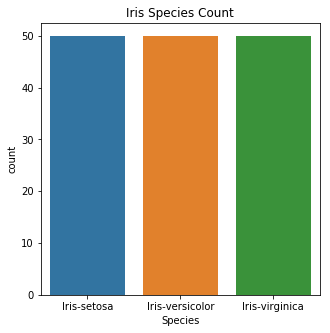

In [16]:
f,ax=plt.subplots(figsize=(5,5))
sns.countplot('Species',data=df)
ax.set_title('Iris Species Count')
plt.show()

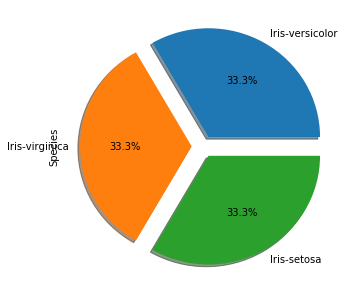

In [20]:
f,ax=plt.subplots(figsize=(5,5))
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(5,5))
plt.show()

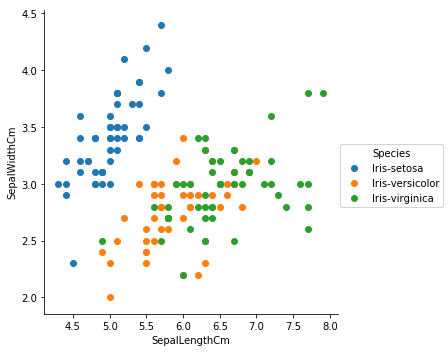

In [23]:
%matplotlib inline
sns.FacetGrid(df,hue='Species',size=5)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()
plt.show()

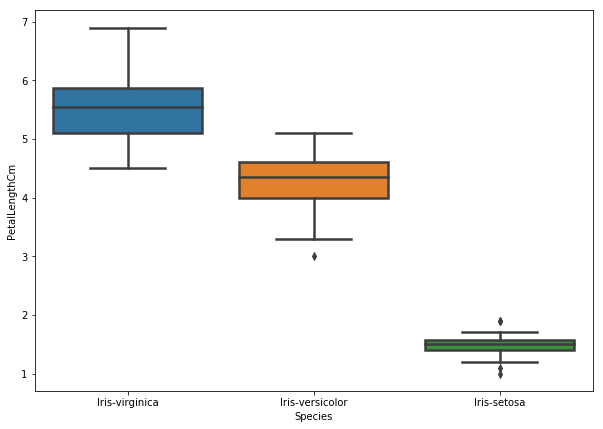

In [24]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=df,
                order=['Iris-virginica','Iris-versicolor','Iris-setosa'],
                linewidth=2.5,orient='v',dodge=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009D65748>,
      dtype=object)

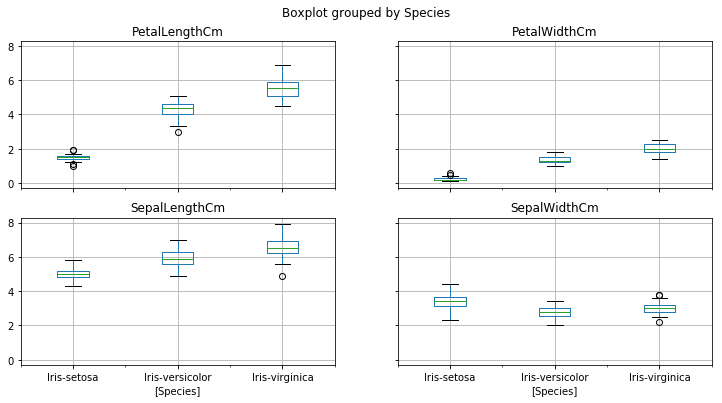

In [25]:
df.boxplot(by="Species", figsize=(12, 6))

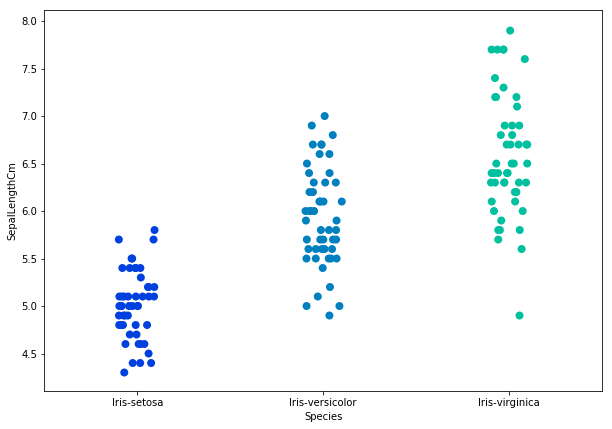

In [26]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='Species',y='SepalLengthCm',
                  data=df,jitter=True,edgecolor='gray',
                  size=8,palette='winter',orient='v')

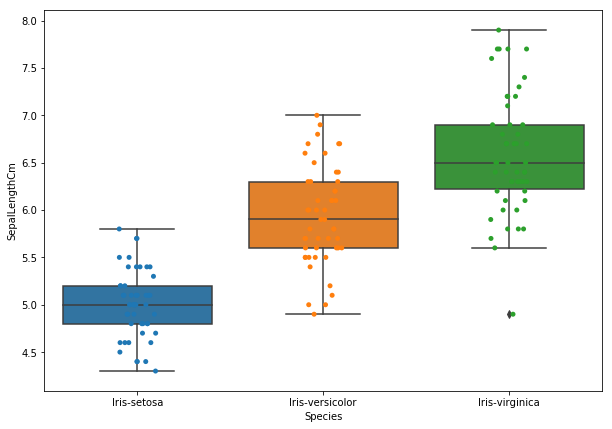

In [27]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='SepalLengthCm',data=df)
fig=sns.stripplot(x='Species',y='SepalLengthCm',data=df,jitter=True,edgecolor='gray')

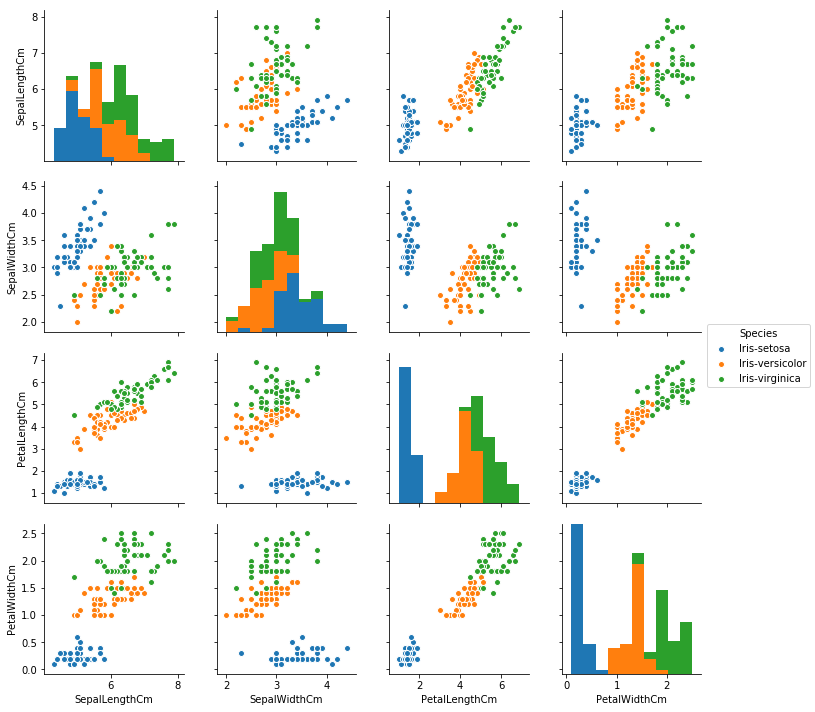

In [28]:
sns.pairplot(df,hue='Species')

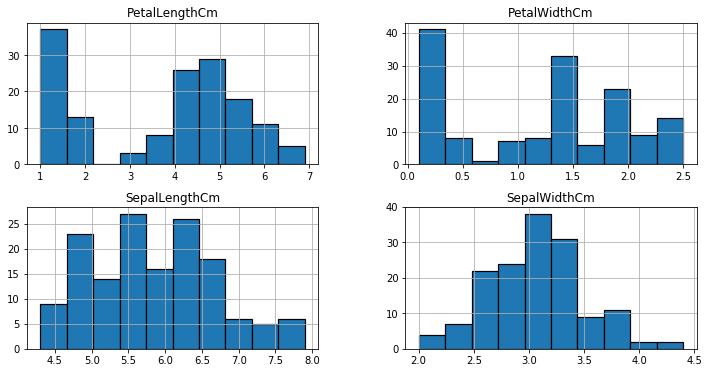

In [29]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

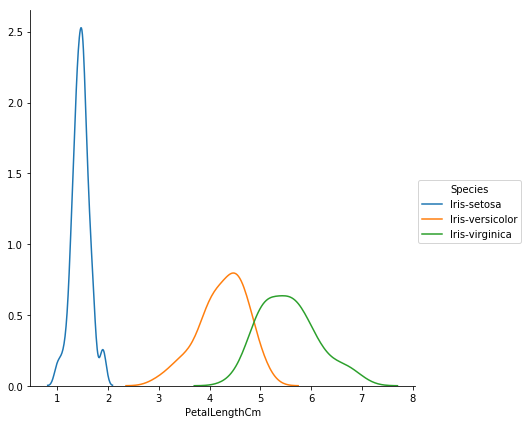

In [31]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.ioff() 

### MODEL BUILDING

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [37]:
#df_train= df.iloc[:, [0,1,2,3]]
df_test= df.iloc[:,[4]]

In [38]:
# Divide the dataset into test train split
train_x, test_x, train_y, test_y = train_test_split(df_train, df_test, test_size= 0.2, random_state = 2)

In [39]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
#logreg.predict(test_x)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
pred_test= logreg.predict(test_x)
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [65]:
pred_train = logreg.predict(train_x)

In [44]:
logreg.predict_proba(test_x)
#Here total 3 types of flowers so, the probability of flower according is shown 

array([[8.73605211e-01, 1.26306008e-01, 8.87813188e-05],
       [7.97319570e-01, 2.02556560e-01, 1.23870289e-04],
       [8.19143889e-04, 2.93425597e-01, 7.05755260e-01],
       [7.57856103e-01, 2.42082259e-01, 6.16375207e-05],
       [8.12928305e-01, 1.86922288e-01, 1.49407211e-04],
       [8.33873129e-04, 5.17287801e-01, 4.81878326e-01],
       [7.46381586e-01, 2.53527179e-01, 9.12353639e-05],
       [2.15341610e-04, 4.23661086e-01, 5.76123572e-01],
       [4.01381717e-04, 2.94909798e-01, 7.04688820e-01],
       [7.92416153e-01, 2.07476674e-01, 1.07173056e-04],
       [8.71768614e-01, 1.28212629e-01, 1.87567971e-05],
       [8.41452340e-01, 1.58450612e-01, 9.70479078e-05],
       [8.20042047e-01, 1.79928228e-01, 2.97245358e-05],
       [9.09052934e-01, 9.09146367e-02, 3.24295391e-05],
       [4.09960568e-02, 4.62748691e-01, 4.96255252e-01],
       [1.13907143e-02, 6.79825702e-01, 3.08783584e-01],
       [6.62010019e-01, 3.37655300e-01, 3.34680584e-04],
       [3.42448020e-02, 6.61249

In [63]:
# Accuracy metrix test data
round(metrics.accuracy_score(test_y, logreg.predict(test_x)), 2)

0.93

In [66]:
# Accuracy metrix train data
round(metrics.accuracy_score(train_y, logreg.predict(train_x)), 2)

0.97

train accuracy is 97% <br>
test accuracy is 93%<br>
So, we conclude that our model is good<br>
Note: test accuracy is less than the train accuracy, so the model is not overfitted

In [101]:
confusion_matrix(test_y, logreg.predict(test_x))

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]], dtype=int64)

In [102]:
confusion_matrix(train_y, logreg.predict(train_x))

array([[36,  0,  0],
       [ 0, 38,  4],
       [ 0,  0, 42]], dtype=int64)

In [103]:
from sklearn.metrics import roc_auc_score

Text(0.5,15,'Predicted label')

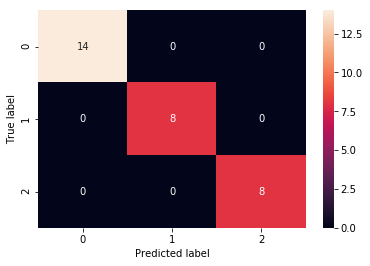

In [106]:
nb_cm = confusion_matrix( test_y,knn.predict( test_x ) )
sns.heatmap(nb_cm, annot=True )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5,15,'Predicted label')

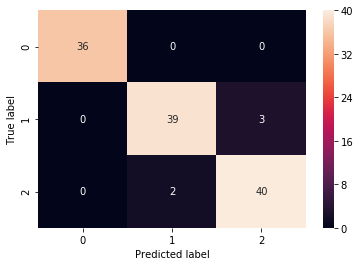

In [107]:
nb_cm = confusion_matrix( train_y,knn.predict( train_x ) )
sns.heatmap(nb_cm, annot=True )
plt.ylabel('True label')
plt.xlabel('Predicted label')